# Machine Learning Foundation

## Section 1, Part d: Feature Engineering 

## Feature Engineering with Linear Regression: Applied to the Ames Housing df

Using the Ames Housing df:

Dean De Cock
Truman State University
Journal of Statistics Education Volume 19, Number 3(2011), www.amstat.org/publications/jse/v19n3/decock.pdf

In this notebook, we will build some linear regression models to predict housing prices from this df. In particular, we will set out to improve on a baseline set of features via **feature engineering**: deriving new features from our existing df. Feature engineering often makes the difference between a weak model and a strong one.

We will use visual exploration, domain understanding, and intuition to construct new features that will be useful later in the course as we turn to prediction.

**Notebook Contents**

> 1. Simple EDA 
> 2. One-hot Encoding variables
> 3. Log transformation for skewed variables
> 4. Pair plot for features
> 5. Basic feature engineering: adding polynomial and interaction terms
> 6. Feature engineering: categories and features derived from category aggregates 

## 1. Simple EDA 

In [94]:
import pandas as pd
import seaborn as sns
import numpy as np

#### Load the df, Examine and Explore

In [95]:
## Load in the Ames Housing df
df = pd.read_csv('..\..\data\Ames_Housing_Data1.tsv', sep='\t')

# Display the first few rows
print(df.head())

   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      1  526301100           20        RL         141.0     31770   Pave   
2      2  526350040           20        RH          80.0     11622   Pave   
3      3  526351010           20        RL          81.0     14267   Pave   
4      4  526353030           20        RL          93.0     11160   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
2   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
3   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
4   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0       

In [96]:
## Examine the columns, look at missing df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2931 entries, 0 to 2930
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2931 non-null   int64  
 1   PID              2931 non-null   int64  
 2   MS SubClass      2931 non-null   int64  
 3   MS Zoning        2931 non-null   object 
 4   Lot Frontage     2441 non-null   float64
 5   Lot Area         2931 non-null   int64  
 6   Street           2931 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2931 non-null   object 
 9   Land Contour     2931 non-null   object 
 10  Utilities        2931 non-null   object 
 11  Lot Config       2931 non-null   object 
 12  Land Slope       2931 non-null   object 
 13  Neighborhood     2931 non-null   object 
 14  Condition 1      2931 non-null   object 
 15  Condition 2      2931 non-null   object 
 16  Bldg Type        2931 non-null   object 
 17  House Style   

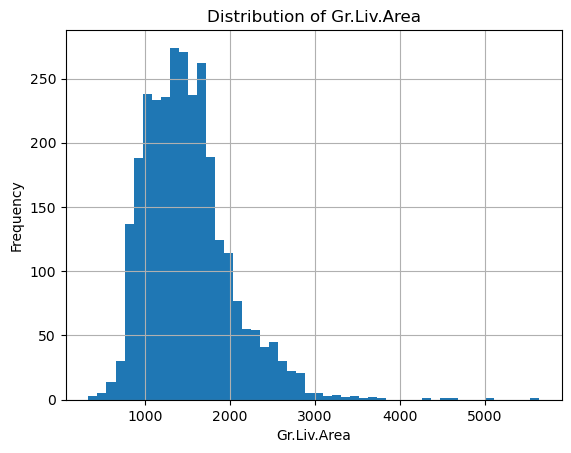

In [97]:
import matplotlib.pyplot as plt

# Plot a histogram of the Gr.Liv.Area column
df['Gr Liv Area'].hist(bins=50)
plt.title('Distribution of Gr.Liv.Area')
plt.xlabel('Gr.Liv.Area')
plt.ylabel('Frequency')
plt.show()

In [98]:
# Filter out rows where Gr.Liv.Area > 4000
df = df[df['Gr Liv Area'] <= 4000]

# Check the new shape of the dfset
print(df.shape)

(2926, 82)


### Feature Selection

In [99]:
# Dropping irrelevant columns
df = df.drop(['Order', 'PID'], axis=1)

### Feature Transformation

In [100]:
# Selecting only numeric columns
numeric_cols = df.select_dtypes(include=['number'])

# Checking skewness for numeric columns
skew_vals = numeric_cols.skew()
print(skew_vals)

MS SubClass         1.356915
Lot Frontage        1.113571
Lot Area           13.154455
Overall Qual        0.171750
Overall Cond        0.573267
Year Built         -0.602169
Year Remod/Add     -0.448677
Mas Vnr Area        2.565828
BsmtFin SF 1        0.821599
BsmtFin SF 2        4.136716
Bsmt Unf SF         0.925413
Total Bsmt SF       0.399066
1st Flr SF          0.941362
2nd Flr SF          0.848035
Low Qual Fin SF    12.109736
Gr Liv Area         0.878650
Bsmt Full Bath      0.614609
Bsmt Half Bath      3.966772
Full Bath           0.165577
Half Bath           0.703508
Bedroom AbvGr       0.306780
Kitchen AbvGr       4.310424
TotRms AbvGrd       0.704708
Fireplaces          0.731945
Garage Yr Blt      -0.381364
Garage Cars        -0.220068
Garage Area         0.213447
Wood Deck SF        1.847112
Open Porch SF       2.495300
Enclosed Porch      4.011358
3Ssn Porch         11.395843
Screen Porch        3.954290
Pool Area          18.746993
Misc Val           22.228804
Mo Sold       

In [101]:
skew_limit = 0.75
skewed_features = skew_vals[skew_vals > skew_limit].index

import numpy as np

# Applying log transformation to skewed features
for col in skewed_features:
    df[col] = np.log1p(df[col])

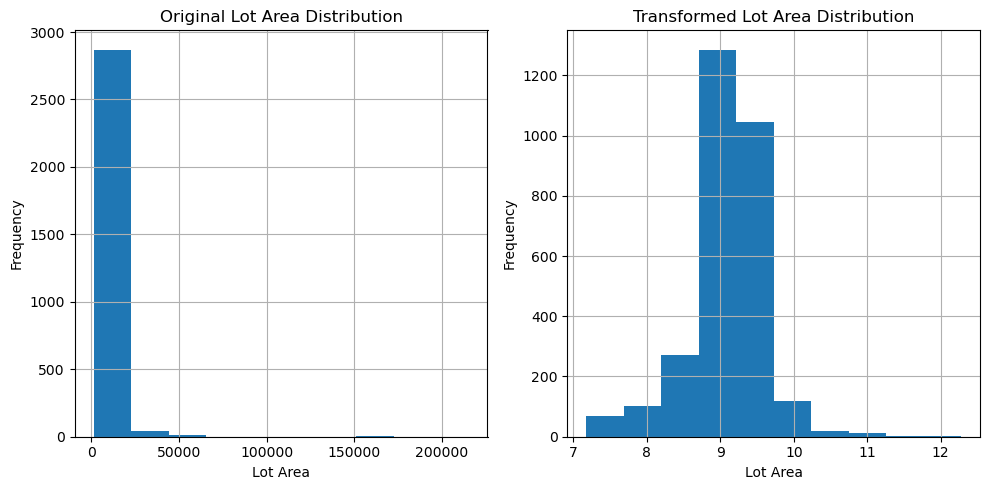

In [102]:
# Feature to analyze
feature = 'Lot Area'  # Replace with any skewed feature

# Plotting the original and transformed distributions
plt.figure(figsize=(10, 5))

# Original distribution
plt.subplot(1, 2, 1)
numeric_cols[feature].hist()
plt.title(f'Original {feature} Distribution')
plt.xlabel(feature)
plt.ylabel('Frequency')

# Transformed distribution
plt.subplot(1, 2, 2)
df[feature].hist()
plt.title(f'Transformed {feature} Distribution')
plt.xlabel(feature)
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Handling Missing Values

In [103]:
# Identifying missing values
missing_values = df.isnull().sum().sort_values(ascending=False)
print(missing_values[missing_values > 0])

Pool QC           2915
Misc Feature      2821
Alley             2728
Fence             2355
Mas Vnr Type      1774
Fireplace Qu      1422
Lot Frontage       490
Garage Cond        159
Garage Yr Blt      159
Garage Finish      159
Garage Qual        159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
BsmtFin Type 1      80
Bsmt Cond           80
Bsmt Qual           80
Mas Vnr Area        23
Bsmt Full Bath       2
Bsmt Half Bath       2
Bsmt Unf SF          1
Garage Cars          1
Electrical           1
Total Bsmt SF        1
BsmtFin SF 1         1
Garage Area          1
BsmtFin SF 2         1
dtype: int64


Replacing Missing Values for Features Indicating Absence

In [104]:
# Replace missing values with 'None' for categorical features indicating absence
columns_to_fill_with_none = ['Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu']
for col in columns_to_fill_with_none:
    df[col].fillna('None', inplace=True)

C:\Users\hamin\AppData\Local\Temp\ipykernel_28452\122626764.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('None', inplace=True)


Replacing Missing Values in Basement-Related Features

In [105]:
# Handling basement-related features
basement_categorical = ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
for col in basement_categorical:
    df[col].fillna('None', inplace=True)

basement_numerical = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
for col in basement_numerical:
    df[col].fillna(0, inplace=True)

C:\Users\hamin\AppData\Local\Temp\ipykernel_28452\809663821.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('None', inplace=True)
C:\Users\hamin\AppData\Local\Temp\ipykernel_28452\809663821.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doi

Replacing Missing Values in Garage-Related Features

In [106]:
# Handling garage-related features
garage_categorical = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
for col in garage_categorical:
    df[col].fillna('None', inplace=True)

garage_numerical = ['Garage Yr Blt', 'Garage Area', 'Garage Cars']
for col in garage_numerical:
    df[col].fillna(0, inplace=True)

C:\Users\hamin\AppData\Local\Temp\ipykernel_28452\3884009808.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('None', inplace=True)
C:\Users\hamin\AppData\Local\Temp\ipykernel_28452\3884009808.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when d

Replacing Missing Values in Other Features

In [107]:
# Filling remaining features
df['Lot Frontage'].fillna(df['Lot Frontage'].median(), inplace=True)
df['Mas Vnr Area'].fillna(0, inplace=True)
df['Mas Vnr Type'].fillna('None', inplace=True)

C:\Users\hamin\AppData\Local\Temp\ipykernel_28452\2851590609.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Lot Frontage'].fillna(df['Lot Frontage'].median(), inplace=True)
C:\Users\hamin\AppData\Local\Temp\ipykernel_28452\2851590609.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

Replacing Minimal Missing Values

In [108]:
df['Electrical'].fillna(df['Electrical'].mode()[0], inplace=True)

C:\Users\hamin\AppData\Local\Temp\ipykernel_28452\1931642042.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Electrical'].fillna(df['Electrical'].mode()[0], inplace=True)


Verifying All Missing Values Are Handled

In [109]:
# Check for remaining missing values
print(df.isnull().sum().max())  # Should return 0

0


### Creating New Features

In [110]:
from sklearn.preprocessing import PolynomialFeatures

# Select numerical columns for polynomial transformation
numerical_cols = ['Lot Area', 'Overall Qual']  # Example numerical columns

# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(df[numerical_cols])

# Convert to a DataFrame
poly_feature_names = poly.get_feature_names_out(numerical_cols)
poly_df = pd.DataFrame(poly_features, columns=poly_feature_names)

# Remove original columns from the generated polynomial DataFrame
poly_df = poly_df.drop(columns=numerical_cols, errors='ignore')

# Add only the new polynomial features to the dataset
df = pd.concat([df, poly_df], axis=1)

In [111]:
# Creating interaction features
df['OverallQual_YearBuilt'] = df['Overall Qual'] * df['Year Built']
df['QualPerLotArea'] = df['Overall Qual'] / df['Lot Area']

In [112]:
# Calculate mean and standard deviation of Overall Qual within each Neighborhood
neighborhood_stats = df.groupby('Neighborhood')['Overall Qual'].agg(
    mean_neigh='mean',
    std_neigh='std'
).reset_index()

# Merge the stats back into the original dataset
df = df.merge(neighborhood_stats, on='Neighborhood', how='left')

# Calculate the deviation of Overall Qual within each neighborhood
df['Qual_Deviation'] = (df['Overall Qual'] - df['mean_neigh']) / df['std_neigh']

### Handling Categorical Data

In [117]:
df['Neighborhood'].value_counts()

Neighborhood
NAmes      444
CollgCr    267
OldTown    239
Edwards    191
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     69
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: count, dtype: int64

In [116]:
df['House Style'].value_counts()

House Style
1Story    1481
2Story     869
1.5Fin     314
SLvl       128
SFoyer      83
2.5Unf      24
1.5Unf      19
2.5Fin       8
Name: count, dtype: int64

In [119]:
# Group low-frequency neighborhoods into "Other"
low_count_neighborhoods = df['Neighborhood'].value_counts()[df['Neighborhood'].value_counts() < 10].index
df['Neighborhood'] = df['Neighborhood'].replace(low_count_neighborhoods, 'Other')

# Group low-frequency house styles into "Other"
low_count_styles = df['House Style'].value_counts()[df['House Style'].value_counts() < 50].index
df['House Style'] = df['House Style'].replace(low_count_styles, 'Other')

One-Hot Encoding

In [120]:
# Apply one-hot encoding to categorical features
df = pd.get_dummies(df, columns=['House Style', 'Neighborhood'], drop_first=True)

Encoding Ordinal Features

In [121]:
# Ordinal encoding for Exter Qual
exter_qual_map = {'Poor': 1, 'Fair': 2, 'Good': 3, 'Excellent': 4}
df['Exter Qual'] = df['Exter Qual'].map(exter_qual_map)

In [123]:
# Check the updated dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2931 entries, 0 to 2930
Columns: 116 entries, MS SubClass to Neighborhood_Veenker
dtypes: bool(30), float64(46), object(40)
memory usage: 2.0+ MB



### Pair plot of features
Now that we have a nice, filtered dfset, let's generate visuals to better understand the target and feature-target relationships: pairplot is great for this!

In [128]:
# Calculate the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Extract and sort correlations with SalePrice
target_corr = correlation_matrix['SalePrice'].sort_values(ascending=False)
print(target_corr)

SalePrice                1.000000
OverallQual_YearBuilt    0.834162
Overall Qual             0.827489
QualPerLotArea           0.733817
mean_neigh               0.730479
                           ...   
Neighborhood_Edwards    -0.194731
Enclosed Porch          -0.220051
Neighborhood_IDOTRR     -0.243680
Neighborhood_OldTown    -0.255239
Exter Qual                    NaN
Name: SalePrice, Length: 76, dtype: float64


In [129]:
# Select top correlated features with SalePrice
top_features = target_corr[target_corr.abs() > 0.5]
print("Top features correlated with SalePrice:")
print(top_features)

Top features correlated with SalePrice:
SalePrice                1.000000
OverallQual_YearBuilt    0.834162
Overall Qual             0.827489
QualPerLotArea           0.733817
mean_neigh               0.730479
Gr Liv Area              0.726131
Lot Area Overall Qual    0.692244
Garage Cars              0.674913
Overall Qual^2           0.668838
Garage Area              0.653704
Total Bsmt SF            0.649027
Year Built               0.616685
1st Flr SF               0.616530
Year Remod/Add           0.587420
Full Bath                0.574949
Name: SalePrice, dtype: float64


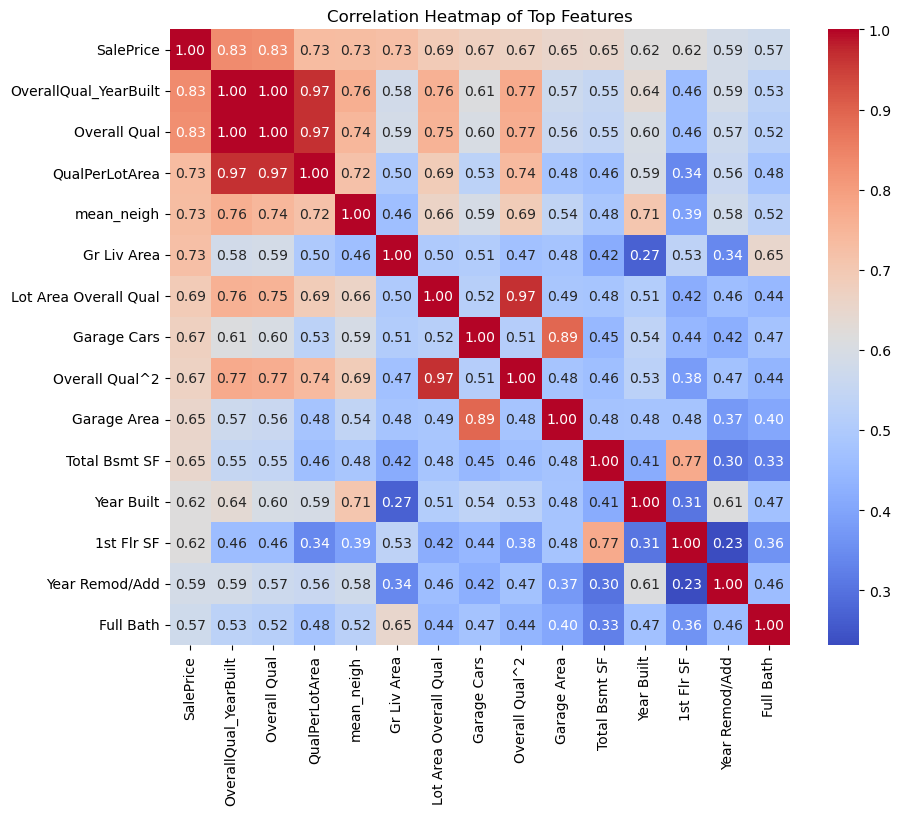

In [133]:
# Calculate the correlation matrix for top features
correlation_matrix = df[top_corr_features].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Top Features")
plt.show()

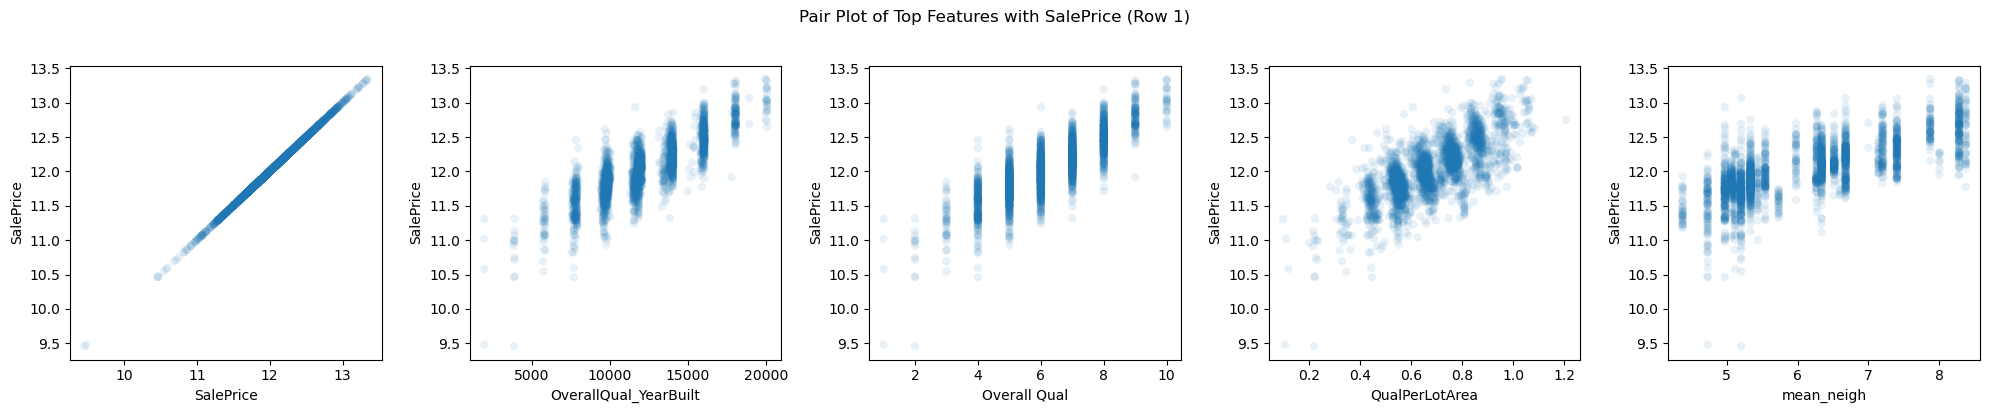

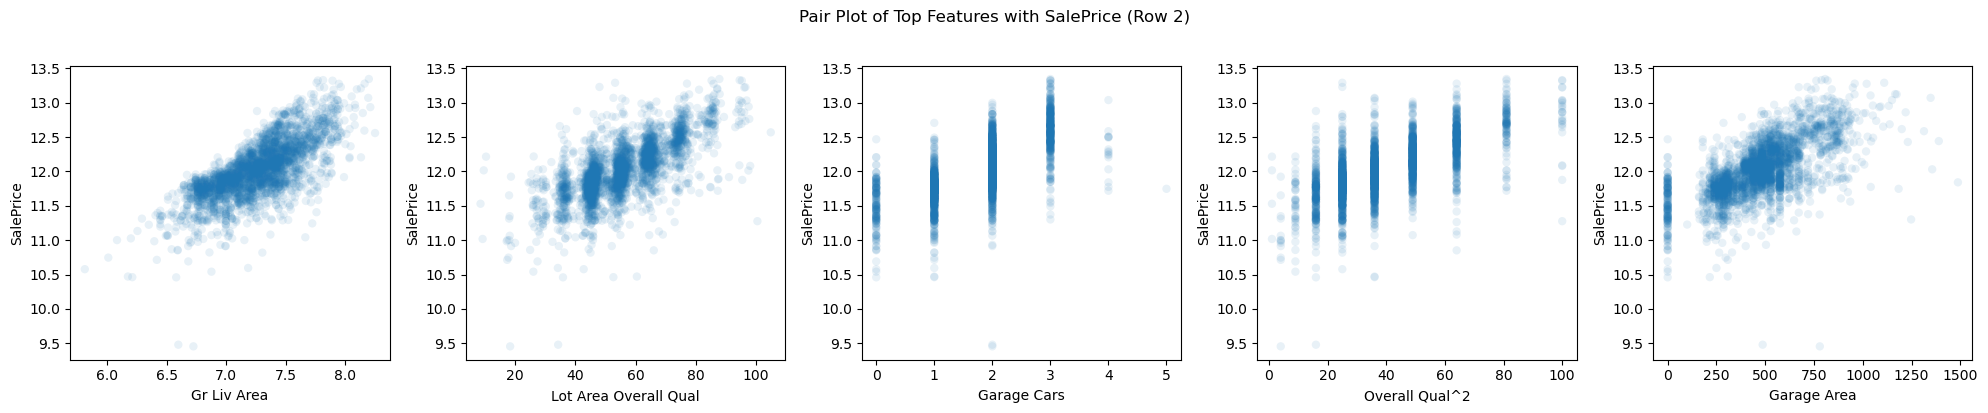

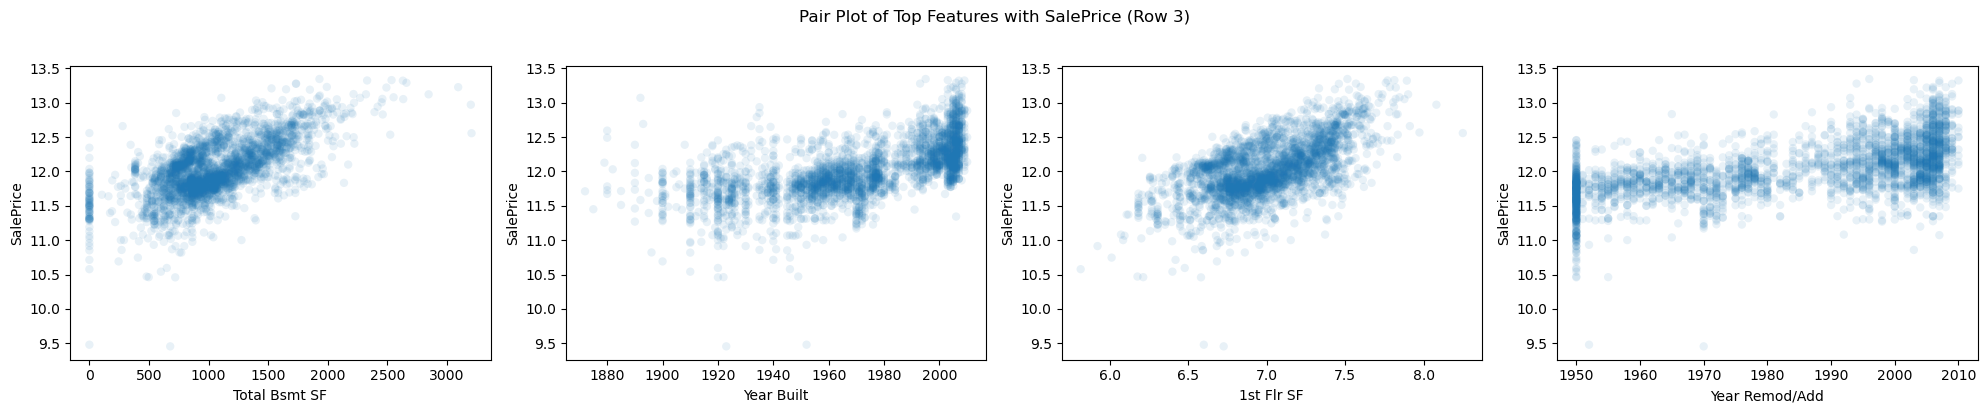

In [132]:
# Extract the list of top correlated features
top_corr_features = top_features.index.tolist()

# Define the maximum number of subplots per row
max_subplots_per_row = 5

# Exclude SalePrice itself
features = top_corr_features[:-1]

# Split features into groups of 5
feature_groups = [features[i:i + max_subplots_per_row] for i in range(0, len(features), max_subplots_per_row)]

# Plot each group in separate rows
for group_idx, feature_group in enumerate(feature_groups):
    plt.figure(figsize=(20, 4))  # Adjust figure size based on the number of subplots
    for i, feature in enumerate(feature_group):
        plt.subplot(1, len(feature_group), i + 1)
        sns.scatterplot(data=df, x=feature, y='SalePrice', alpha=0.1, edgecolor='none')
    plt.suptitle(f"Pair Plot of Top Features with SalePrice (Row {group_idx + 1})", y=1.02)
    plt.tight_layout()
    plt.show()

---
**df Exploration Discussion**: 

1. What do these plots tell us about the distribution of the target?   

2. What do these plots tell us about the relationship between the features and the target? Do you think that linear regression is well-suited to this problem? Do any feature transformations come to mind?

3. What do these plots tell us about the relationship between various pairs of features? Do you think there may be any problems here? 

---